In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])

import numpy as np

In [2]:
def gen_hex_grid(nx,ny, phase = 0):
    '''
    Generate a hexagonal grid of cells on [-1,1]
    '''
    x = np.linspace(-1,1,nx)
    y = np.linspace(-1,1,ny)
    dx = 1./(nx-1)

    X,Y = np.meshgrid(x,y)
    for y in range(phase,ny,2):
        X[y] += dx

    # want to drop every 10th spot
    #   i.e., nx*2
    X,Y = X.flatten(), Y.flatten()
    X = np.delete(X, np.arange(nx*(1+phase)-1,nx*ny, nx*2))
    Y = np.delete(Y, np.arange(nx*(1+phase)-1,nx*ny, nx*2))
    

    return X,Y

In [3]:
def pdist(X,Y):
    '''
    Limited to small N...
    '''
    dist2 = (X[:,None] - X[None,:])**2 + (Y[:,None] - Y[None,:])**2
    # np.triu(dist2).shape
    # dist2
    i = np.triu_indices(len(X), 1)
    dist2 = dist2[i]
    # dist2 = dist2[dist2>0]

    return np.sqrt(dist2)

def dist(X):
    '''
    Limited to small N...
    '''
    dist2 = np.abs(X[:,None] - X[None,:])
    # np.triu(dist2).shape
    # dist2
    i = np.triu_indices(len(X), 1)
    dist2 = dist2[i]
    # dist2 = dist2[dist2>0]

    return dist2




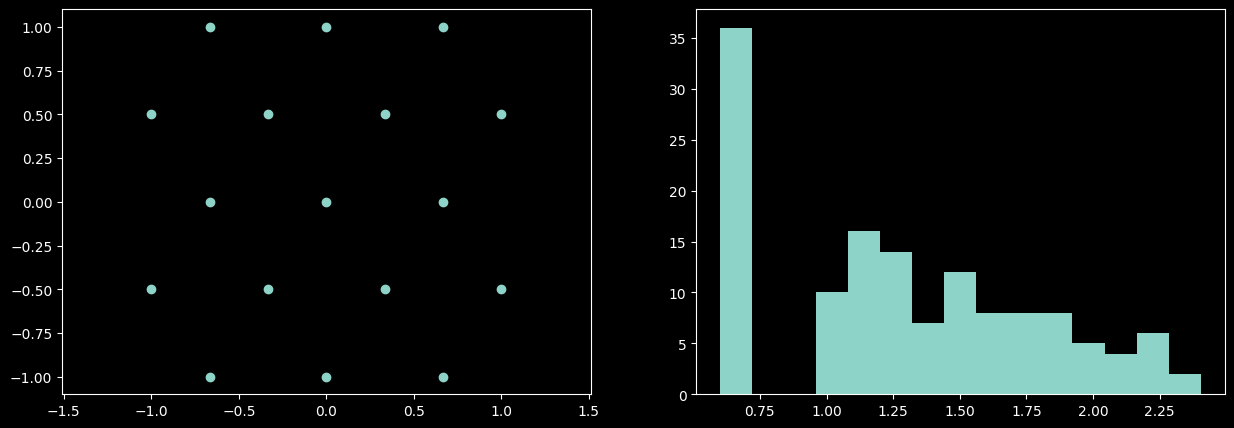

In [4]:
_,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].scatter(*gen_hex_grid(4,5))
axs[0].axis('equal')

axs[1].hist(pdist(*gen_hex_grid(4,5)),15)
plt.show()

In [113]:
def gen_multiscale_hex_grid(nx, ny, phase = 0, pow = 2):


    # R = np.arange(1,nh+1) ** pow
    # X = []
    # Y = []
    # for i,ri in enumerate(R):
    #     th = np.linspace(0,2*np.pi,6*i + 1)[:-1] + np.pi*i
    #     r = ri/np.cos((1/3) * np.arcsin(np.sin(3*th)))

    #     # r,th = np.meshgrid(ri,th)
        
    #     X.append(r*np.cos(th))
    #     Y.append(r*np.sin(th))


    # return np.concatenate(X),np.concatenate(Y)

    X,Y = gen_hex_grid(nx,ny,phase=phase)

    R = np.sqrt(X**2 + Y**2)
    th = np.arctan2(Y,X)

    X = (R**pow)*np.cos(th)
    Y = (R**pow)*np.sin(th)

    return X,Y


74


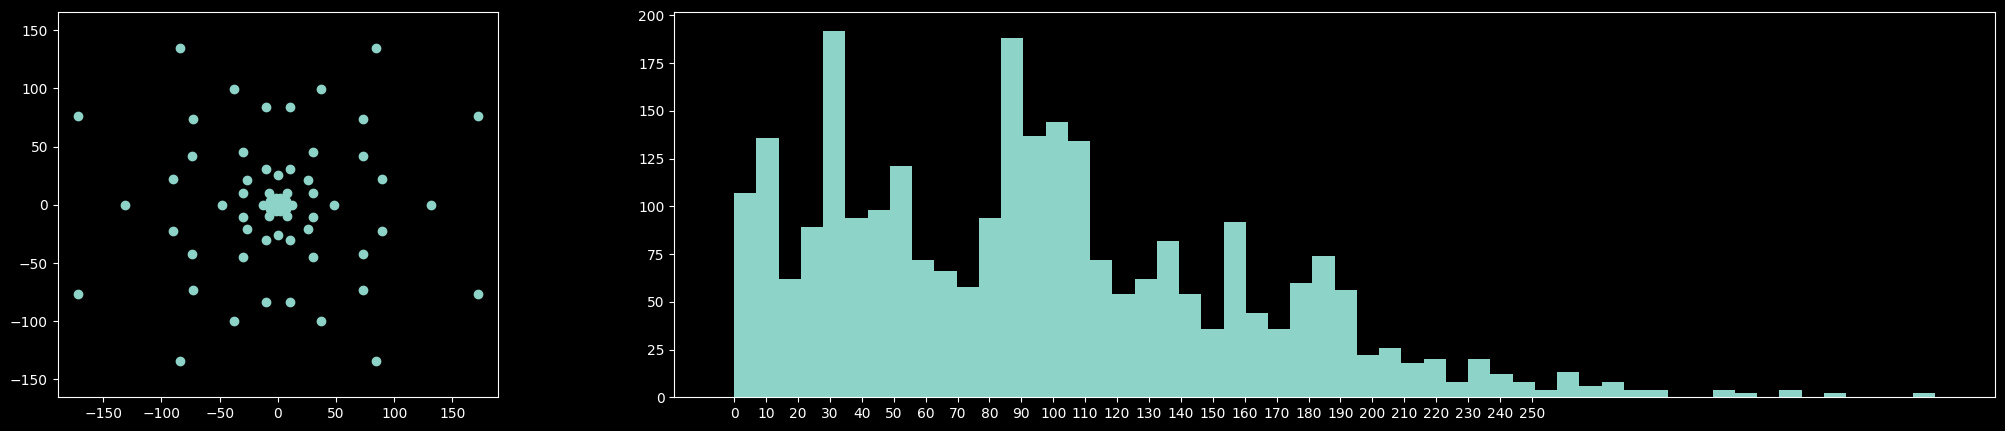

In [119]:
_,axs = plt.subplots(1,2,figsize=(25,5),gridspec_kw={'width_ratios':[1,3]})
X,Y = gen_multiscale_hex_grid(11,11, phase=1,pow=4)


r = 200
X,Y = X*r,Y*r
R = np.sqrt(X**2 + Y**2)
X = X[R<r]
Y = Y[R<r]

axs[0].scatter(X,Y)
# for x,y,r in zip(X,Y,R):
#     # axs[0].text(x,y,f"{r:.02}")
#     axs[0].text(x,y,r)

axs[0].axis('equal')

axs[1].hist(pdist(X,Y),np.sqrt(40*len(X)).astype(int))
axs[1].set_xticks(np.arange(0,260,10))
print(len(X))

In [78]:
Y

array([ nan,  nan,  nan,  nan,  nan,  nan, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf])

(84,)
Number of spots: 84


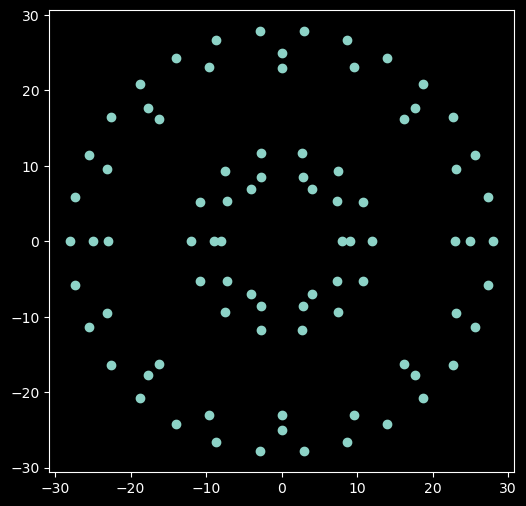

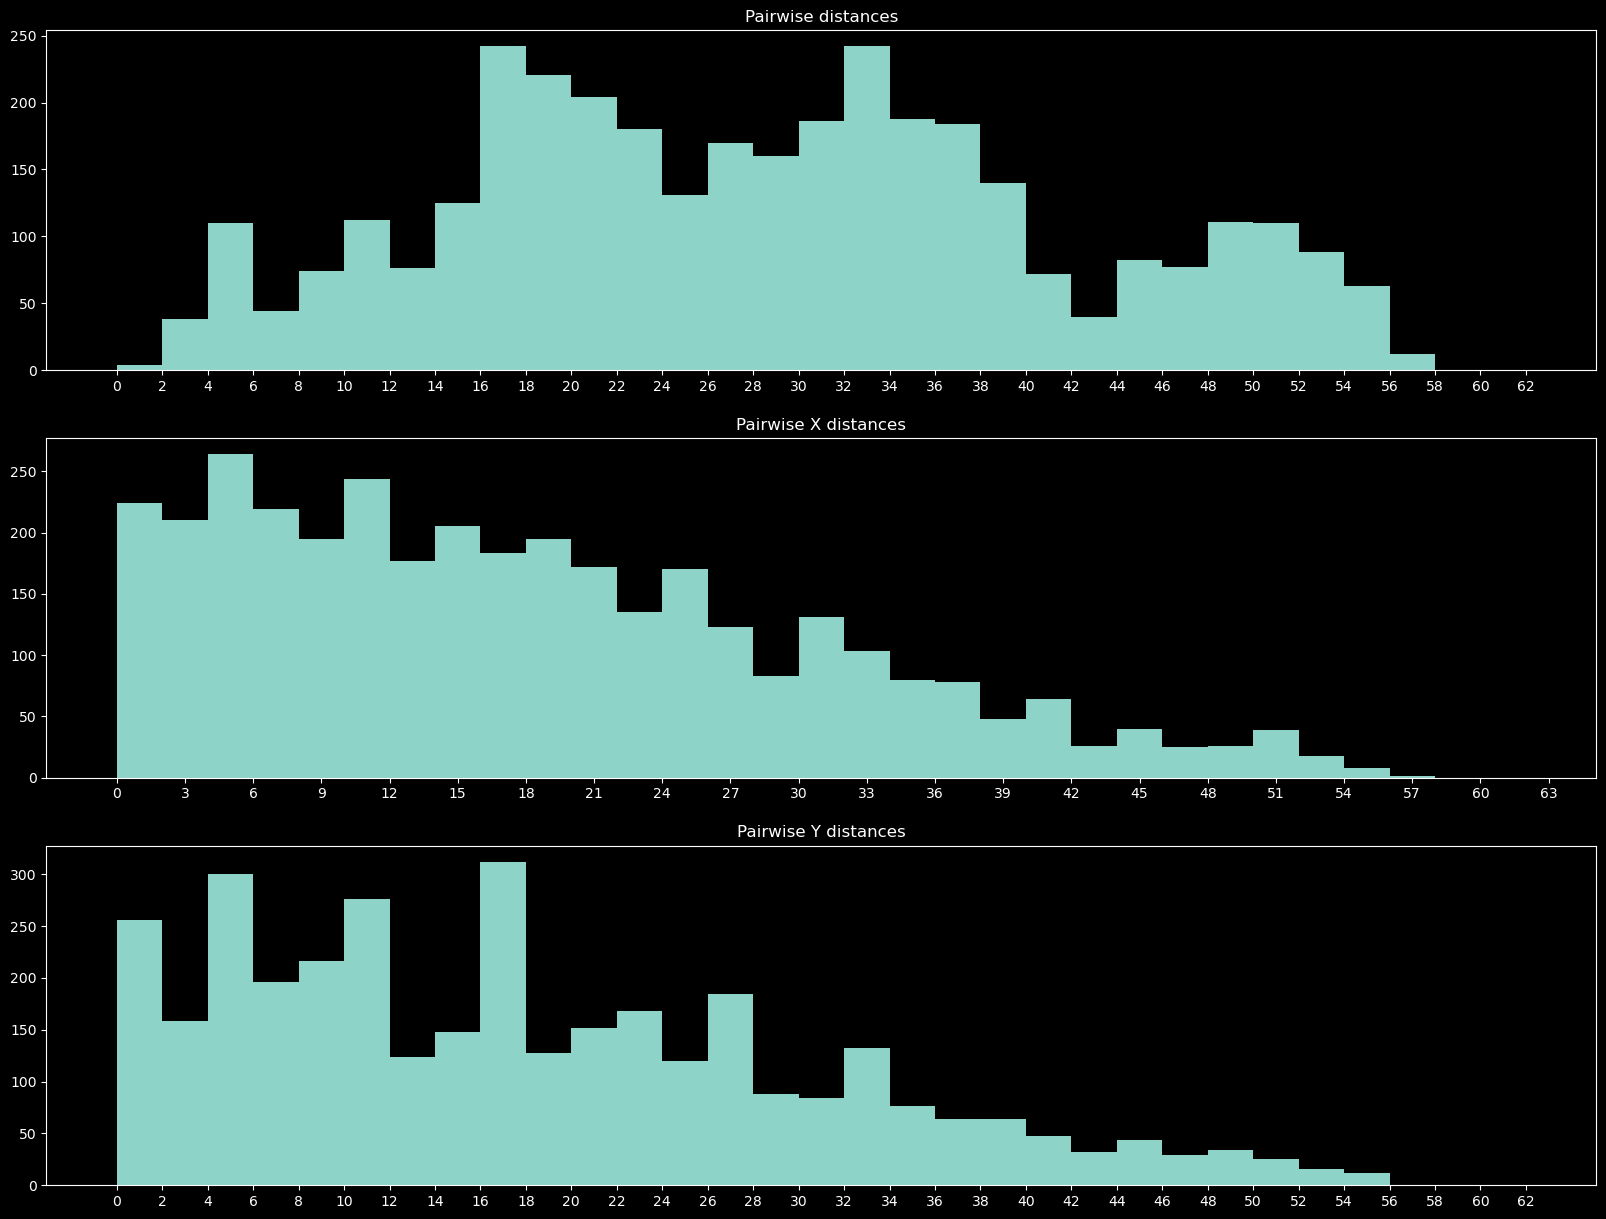

In [21]:
# X1,Y1 = gen_hex_grid(3,3, 0)
# X2,Y2 = gen_hex_grid(2,5, 1)

# d = .1
# f = .2

# X3, Y3 = np.array([-.5, -.5, .5, .5]), np.array([-.5, .5, -.5, .5])

# # X = np.concatenate((X1, X1,     X1-d,   X1+d,   X1))
# # Y = np.concatenate((Y1, Y1-d,   Y1,     Y1,     Y1+d))

# # X = np.concatenate((X1, X1-d,   X1-d,   X1+d,   X1+d))
# # Y = np.concatenate((Y1, Y1-d,   Y1+d,   Y1-d,   Y1+d))


# X = np.concatenate((X1, X1,     X1+d,   X1-d,   X1+3*d, X1-2*d, X2, X3+d))
# Y = np.concatenate((Y1, Y1+d,   Y1,     Y1-d,   Y1+3*d, Y1+2*d, Y2, Y3+d))

# # X = np.concatenate((X1, X2))
# # Y = np.concatenate((Y1, Y2))

# X,Y = X/(X.max() - X.min())*60 * (1+f), Y/(Y.max() - Y.min())*60 * (1+f)

# XY = np.unique(np.stack((X,Y), axis=1), axis=0)
# X,Y = XY[:,0], XY[:,1]
# # X,Y = X1,Y1
# # Y = Y*1.5

# xyi = np.logical_or(np.abs(X) >= 10, np.abs(Y) >= 10)
# X,Y = X[xyi], Y[xyi]


# # dist2[i] = np.nan

# # N = 66
# # # # X = np.random.rand(N)*60 - 30
# # # # Y = np.random.rand(N)*60 - 30
# # # R = np.random.rand(N)*30 + 30
# # # TH = np.random.rand(N) * 2 * np.pi

# # R = np.tile(np.array([45, 30, 60])[None,:], N//3).flatten()
# # TH = np.linspace(0,2*np.pi, N+1)[:-1]

# # X = R * np.cos(TH)
# # Y = R * np.sin(TH)

# # X,Y = gen_hex_grid(16,16)
# # D = 60
# # X,Y = X * D / 2, Y * D / 2
# # xyi = np.logical_and((X**2 + Y**2) >= 20**2, (X**2 + Y**2) <= (D/2)**2)
# # X,Y = X[xyi], Y[xyi]


# X,Y = np.array([]), np.array([])
# # for i,r in enumerate([20, 25, 30]):
# for n,r in zip([9, 18, 36], [23, 24, 25]):
# # for n,r in zip([9, 18, 36], [22, 24, 30]):
#     # c = 2*np.pi*r
#     # n = np.round(c / d / (4-i)).astype(int)
#     th = np.linspace(0, 2*np.pi, n+1)[:-1]
#     th = th+(np.pi/n)
#     X = np.concatenate((X, r*np.cos(th)))
#     Y = np.concatenate((Y, r*np.sin(th)))
    

X,Y = np.array([]), np.array([])
# # for n,r in zip([4,8,16, 20,40,45, 40,60,80], [32,33,36, 100,115,130, 236,240,248]):
# # for n,r in zip([4,8,16,], [32,33,36,]):
# for n,r in zip([4,6, 6,8,16, 20,28,36, 28,40,48,], [6,8, 36,37,40, 70,76,84, 120,115,130,]):
for n,r in zip([6, 10, 14, 8, 16, 30], [8, 9, 12, 22, 24, 28]):
    # c = 2*np.pi*r
    # n = np.round(c / d / (4-i)).astype(int)
    th = np.linspace(0, 2*np.pi, n+1)[:-1]
    # th = th+(np.pi/n)
    X = np.concatenate((X, r*np.cos(th)))
    Y = np.concatenate((Y, r*np.sin(th)))
    

    

print(X.shape)

# plt.imshow(dist2)
print('Number of spots:', len(X))
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.axis('equal')
plt.show()

d_dist = 2
max_dist = 64
_,axs = plt.subplots(3,1,figsize=(20,15))
axs[0].hist(pdist(X,Y), np.arange(0,max_dist,d_dist))
axs[0].set_xticks(np.arange(0,max_dist,d_dist))
axs[0].set_title('Pairwise distances')


axs[1].hist(dist(X), np.arange(0,max_dist,d_dist))
axs[1].set_xticks(np.arange(0,max_dist,3))
axs[1].set_title('Pairwise X distances')

axs[2].hist(dist(Y), np.arange(0,max_dist,d_dist))
axs[2].set_xticks(np.arange(0,max_dist,d_dist))
axs[2].set_title('Pairwise Y distances')
plt.show()

In [8]:
2*np.pi*75 / 70

6.731984257692414

Text(0.5, 1.0, 'Relative photon delivery')

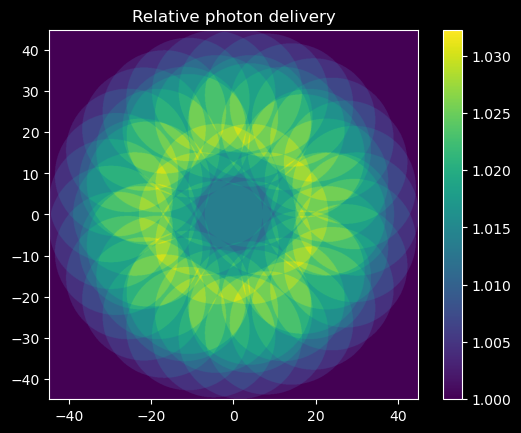

In [15]:
rad = 15
contrast = 10
rel_on_time = .2

qx = np.linspace(X.min() - rad, X.max() + rad,1000)
qy = np.linspace(Y.min() - rad, Y.max() + rad,1000)
QX,QY = np.meshgrid(qx, qy)
stim = np.zeros_like(QX)

for x,y in zip(X,Y):
    xyi = ((QX - x)**2 + (QY-y)**2) <= (rad**2)
    stim[xyi] += 1

stim = stim / stim.max()
stim = stim * contrast * rel_on_time / len(X)
stim += 1

plt.imshow(stim, extent=[X.min() - rad, X.max() + rad,Y.min() - rad, Y.max() +rad])
plt.colorbar()
plt.title('Relative photon delivery')
# plt.clim(vmin=0.0)



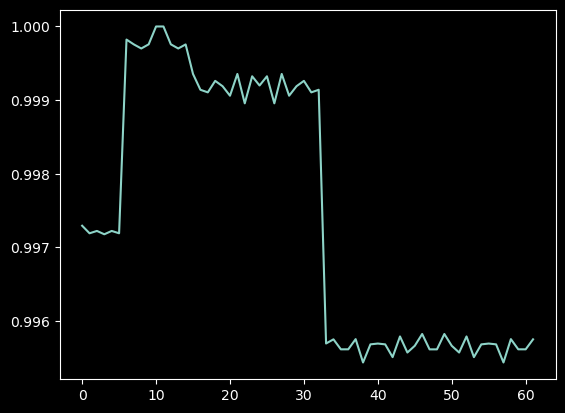

In [16]:
dose = np.empty_like(X)
for i,(x,y) in enumerate(zip(X,Y)):
    xyi = ((QX - x)**2 + (QY-y)**2) <= (rad**2)
    dose[i] = stim[xyi].sum()

plt.plot(dose / dose.max())

In [409]:
dists = pdist(X,Y)
i = np.triu_indices(len(X), 1)
Xpair = ((X[:,None] + X[None,:])/2)[i]
Ypair = ((Y[:,None] + Y[None,:])/2)[i]

# dist2 = dist2[i]

(-129.25, 129.25, -129.25, 129.25)

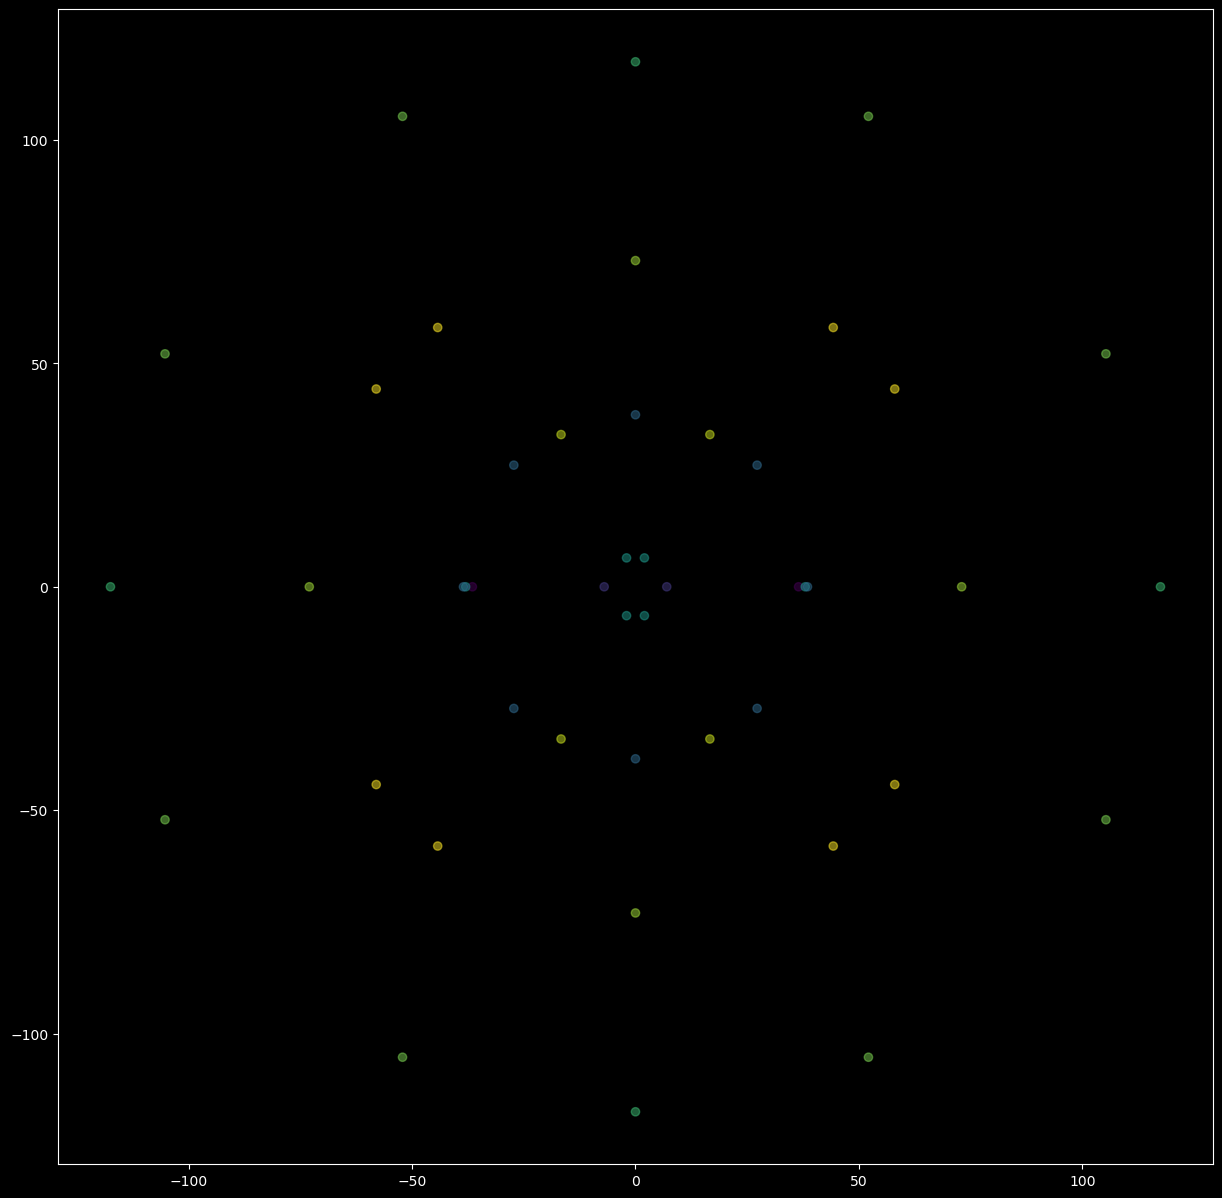

In [412]:
plt.figure(figsize=(15,15))
thresh = 7
plt.scatter(Xpair[dists<thresh], Ypair[dists<thresh], c=dists[dists<thresh], alpha=.5)
plt.axis('square')

In [ ]:
#python
X,Y = np.array([]), np.array([])
for n,r in zip([4,6, 6,8,16, 20,28,36, 28,40,48,], [6,8, 36,37,40, 70,76,84, 120,115,130,]):
    th = np.linspace(0, 2*np.pi, n+1)[:-1]
    X = np.concatenate((X, r*np.cos(th)))
    Y = np.concatenate((Y, r*np.sin(th)))    

In [401]:
th = np.linspace(0,2*np.pi,10000)
#compare to th=0, i.e. x=1,y=0
ds = np.sqrt((np.cos(th)-1)**2 + np.sin(th)**2)

1.1974921630094044

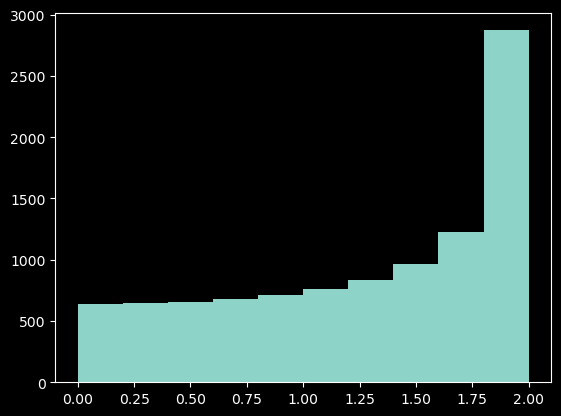

In [405]:
n,_,_ = plt.hist(ds, 10)
# 286/64
n[len(n)//2] / n[0]
# n